TWO-WAY MIXED MODEL ANOVA: EFFECT OF MARGARINE BRAND AND TIME ON CHOLESTEROL

1. DESCRIPTIVE STATISTICS
------------------------------------------------------------------------------------------

Descriptive Statistics filtered by Margarine A
------------------------------------------------------------------------------------------
                         After4weeks  After8weeks  Before
Valid                          8.000        8.000   8.000
Mean                           5.469        5.409   5.945
Std. Deviation                 1.388        1.374   1.428
Skewness                       0.200        0.172   0.024
Std. Error of Skewness         0.752        0.752   0.752
Kurtosis                      -1.998       -2.010  -1.744
Std. Error of Kurtosis         1.481        1.481   1.481
Shapiro-Wilk                   0.871        0.876   0.901
P-value of Shapiro-Wilk        0.154        0.174   0.292
--------------------------------------------------------------------------------------

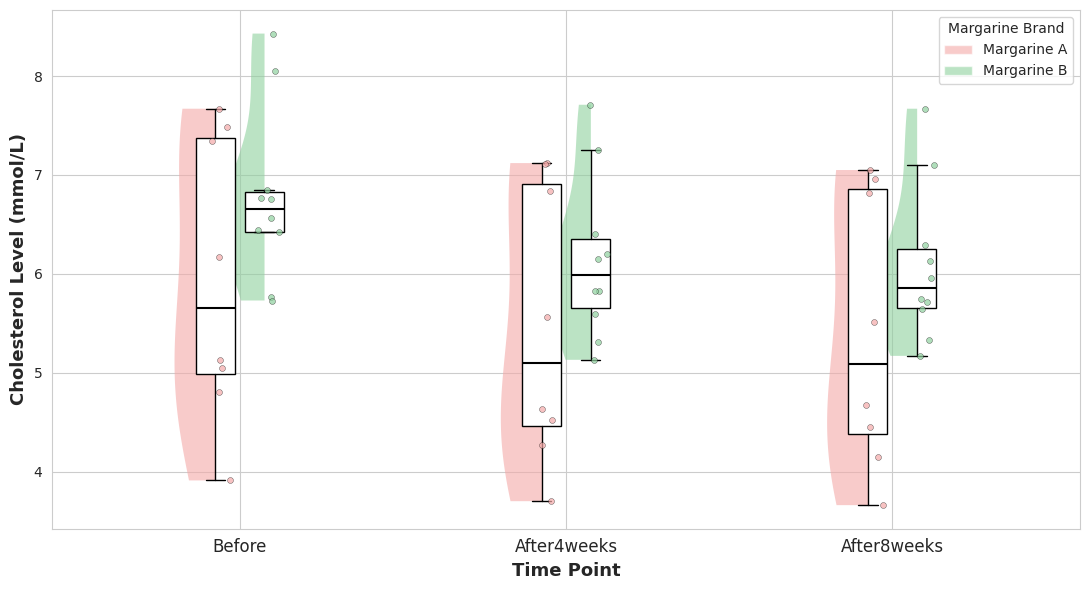

Raincloud plot saved as 'cholesterol_raincloud_plot.png'

3. HOMOGENEITY OF VARIANCES (LEVENE'S TEST)
------------------------------------------------------------------------------------------

Test for Equality of Variances
(Levene's)
--------------------------------------------------
F           df1          df2          p
--------------------------------------------------
2.667       5.000       48.000       0.033
--------------------------------------------------


4. BOX'S M TEST (HOMOGENEITY OF COVARIANCES)
------------------------------------------------------------------------------------------
Box's M Statistic: 5.107
Chi-square:        4.048
df:                6
p-value:           0.670


5. TWO-WAY MIXED ANOVA RESULTS
------------------------------------------------------------------------------------------
                       sum_sq    df         F  PR(>F)
C(Margarine)           2.7101   1.0  326.1957  0.0000
C(Time)                4.3195   2.0  259.9542  0.0000
C(ID)   

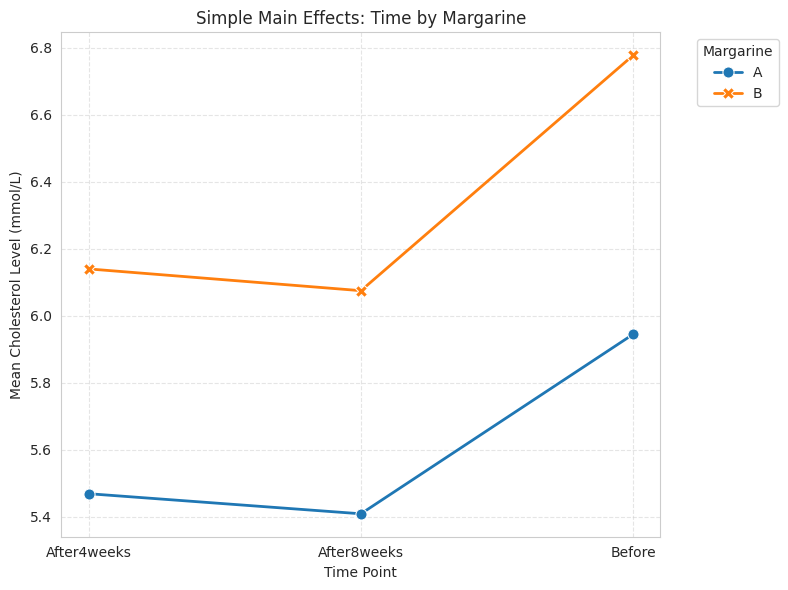

Plot A generated.

------------------------------------------------------------------------------------------

--- B. Simple Main Effects of MARGARINE (within Time) ---
Time            |  Sum of Squares |  df |  Mean Square |        F |        p
--------------------------------------------------------------------------------
Before          |           3.084 |   1 |        3.084 |    2.346 |    0.145
After4weeks     |           2.003 |   1 |        2.003 |    1.647 |    0.218
After8weeks     |           1.973 |   1 |        1.973 |    1.691 |    0.212


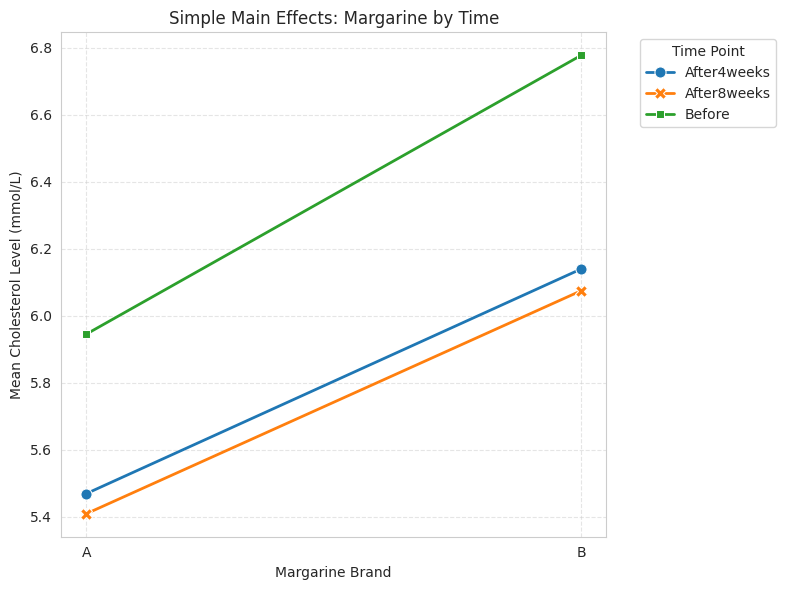

Plot B generated.

11. SUMMARY AND CONCLUSION

CONCLUSION REGARDING NULL HYPOTHESIS:
------------------------------------------------------------------------------------------
Null hypothesis: There is no significant difference in cholesterol levels
between the two brands of margarine over the three time points.

REJECT the null hypothesis. The data indicate a significant effect of margarine brand and/or an interaction with time.
- Significant main effect of margarine brand detected (p = 0.0000)
- Significant interaction effect detected (p = 0.0149)

Note: Significant main effect of time was found (p = 0.0000),
indicating both brands generally showed a decrease in cholesterol levels over time.

ANALYSIS COMPLETE


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

print("="*90)
print("TWO-WAY MIXED MODEL ANOVA: EFFECT OF MARGARINE BRAND AND TIME ON CHOLESTEROL")
print("="*90)
print()

# -----------------------------
# DATASET
# -----------------------------
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'Before': [6.42, 6.76, 6.56, 4.8, 8.43, 7.49, 8.05, 5.05, 5.77, 3.91, 6.77, 6.44, 6.17, 7.67, 7.34, 6.85, 5.13, 5.73],
    'After4weeks': [5.83, 6.2, 5.83, 4.27, 7.71, 7.12, 7.25, 4.63, 5.31, 3.7, 6.15, 5.59, 5.56, 7.11, 6.84, 6.4, 4.52, 5.13],
    'After8weeks': [5.75, 6.13, 5.71, 4.15, 7.67, 7.05, 7.1, 4.67, 5.33, 3.66, 5.96, 5.64, 5.51, 6.96, 6.82, 6.29, 4.45, 5.17],
    'Margarine': ['B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'B']
}
df = pd.DataFrame(data)

# Prepare data for analysis - Reshape from wide to long format
df_long = pd.melt(df,
                  id_vars=['ID', 'Margarine'],
                  value_vars=['Before', 'After4weeks', 'After8weeks'],
                  var_name='Time',
                  value_name='Cholesterol')

df_long['ID'] = df_long['ID'].astype(str)
df_long['Margarine'] = df_long['Margarine'].astype(str)
time_order = ['Before', 'After4weeks', 'After8weeks']

# -----------------------------
# 1. DESCRIPTIVE STATISTICS
# -----------------------------
print("1. DESCRIPTIVE STATISTICS")
print("-" * 90)

# Standard Error of Skewness (SES)
def calc_se_skew(n):
    return np.sqrt((6*n*(n-1)) / ((n-2)*(n+1)*(n+3)))

# Standard Error of Kurtosis (SEK)
def calc_se_kurtosis(n):
    se_skew = calc_se_skew(n)
    return np.sqrt((4*(n**2 - 1) * se_skew**2) / ((n-3)*(n+5)))

for marg in ['A', 'B']:
    print(f"\nDescriptive Statistics filtered by Margarine {marg}")
    print("-" * 90)

    subset = df_long[df_long['Margarine'] == marg]
    table_data = {}

    # Group by Time
    groups = subset.groupby('Time')

    for time_point, group_df in groups:
        chol_data = group_df['Cholesterol']
        n = len(chol_data)

        mean_val = chol_data.mean()
        std_val = chol_data.std()

        w_stat, p_val = stats.shapiro(chol_data)

        skew_val = chol_data.skew()
        kurt_val = chol_data.kurtosis()

        se_skew = calc_se_skew(n)
        se_kurt = calc_se_kurtosis(n)

        table_data[time_point] = {
            'Valid': int(n),
            'Mean': round(mean_val, 3),
            'Std. Deviation': round(std_val, 3),
            'Skewness': round(skew_val, 3),
            'Std. Error of Skewness': round(se_skew, 3),
            'Kurtosis': round(kurt_val, 3),
            'Std. Error of Kurtosis': round(se_kurt, 3),
            'Shapiro-Wilk': round(w_stat, 3),
            'P-value of Shapiro-Wilk': round(p_val, 3)
        }

    stats_table = pd.DataFrame(table_data)
    print(stats_table.to_string())
    print("-" * 90)

# -----------------------------
# 2. RAINCLOUD PLOT
# -----------------------------
print("\n2. CREATING RAINCLOUD PLOT")
print("-" * 90)

plt.figure(figsize=(11, 6))

margarines = ["A", "B"]
time_points = time_order

# Colors
marg_colors = {
    "A": "#F4A9A8",     # soft red
    "B": "#8FD19E"      # soft green
}

# Spacing and offset
positions = np.arange(len(time_points))
offset = 0.15

for i, marg in enumerate(margarines):
    shift = (i - 0.5) * offset
    x_positions = positions + shift

    marg_data = [
        df_long[(df_long["Time"] == time) & (df_long["Margarine"] == marg)]["Cholesterol"].values
        for time in time_points
    ]

    # Half-violin (raincloud shape)
    violins = plt.violinplot(
        marg_data,
        positions=x_positions,
        widths=0.25,
        showmedians=False,
        showmeans=False,
        showextrema=False
    )

    # Make them "half" violins
    for body in violins["bodies"]:
        m = np.mean(body.get_paths()[0].vertices[:, 0])
        body.get_paths()[0].vertices[:, 0] = np.clip(
            body.get_paths()[0].vertices[:, 0],
            -np.inf, m
        )
        body.set_color(marg_colors[marg])
        body.set_alpha(0.6)
        body.set_edgecolor('none')

    # Boxplot overlay
    plt.boxplot(
        marg_data,
        positions=x_positions,
        widths=0.12,
        patch_artist=True,
        showfliers=False,
        boxprops=dict(facecolor="white", edgecolor="black"),
        medianprops=dict(color="black", linewidth=1.5),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        zorder=3
    )

    # Jittered points
    for j, subset in enumerate(marg_data):
        jitter = np.random.normal(x_positions[j] + 0.02, 0.015, size=len(subset))
        plt.scatter(
            jitter,
            subset,
            color=marg_colors[marg],
            alpha=0.7,
            s=18,
            edgecolor="black",
            linewidth=0.3,
            zorder=5
        )

# Labels and legend
plt.xticks(positions, time_points, fontsize=12)
plt.xlabel("Time Point", fontsize=13, fontweight="bold")
plt.ylabel("Cholesterol Level (mmol/L)", fontsize=13, fontweight="bold")

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=marg_colors[m], label=f'Margarine {m}', alpha=0.6) for m in margarines
]
plt.legend(handles=legend_elements, title="Margarine Brand")

plt.tight_layout()
plt.savefig("cholesterol_raincloud_plot.png", dpi=300)
plt.show()

print("Raincloud plot saved as 'cholesterol_raincloud_plot.png'\n")

# -----------------------------
# 3. HOMOGENEITY OF VARIANCES (LEVENE'S TEST)
# -----------------------------
print("3. HOMOGENEITY OF VARIANCES (LEVENE'S TEST)")
print("-" * 90)

grouped_data = df_long.groupby(['Margarine', 'Time'])['Cholesterol']
samples = [group for name, group in grouped_data]

stat, p_val = stats.levene(*samples)

k = len(samples)
N = len(df_long)
df1 = k - 1
df2 = N - k

print("\nTest for Equality of Variances")
print("(Levene's)")
print("-" * 50)
print("F           df1          df2          p")
print("-" * 50)
print(f"{stat:.3f}       {df1:.3f}       {df2:.3f}       {p_val:.3f}")
print("-" * 50)
print("\n")

# -----------------------------
# 4. BOX'S M TEST
# -----------------------------
print("4. BOX'S M TEST (HOMOGENEITY OF COVARIANCES)")
print("-" * 90)

def calculate_box_m(df, dvs, group_col):
    groups = df[group_col].unique()
    k = len(dvs)
    g = len(groups)
    n_total = len(df)

    pooled_cov = np.zeros((k, k))
    term2 = 0

    for group in groups:
        sub_df = df[df[group_col] == group][dvs]
        ni = len(sub_df)
        cov_i = sub_df.cov()
        pooled_cov += (ni - 1) * cov_i
        term2 += (ni - 1) * np.log(np.linalg.det(cov_i))

    pooled_cov /= (n_total - g)
    term1 = (n_total - g) * np.log(np.linalg.det(pooled_cov))

    box_m = term1 - term2

    c = ((2*k**2 + 3*k - 1) / (6*(k+1)*(g-1))) * (sum([1/(len(df[df[group_col]==gr])-1) for gr in groups]) - 1/(n_total-g))
    chi_sq = box_m * (1 - c)
    df_chi = (k * (k + 1) * (g - 1)) / 2

    p_val = 1 - stats.chi2.cdf(chi_sq, df_chi)

    return box_m, chi_sq, int(df_chi), p_val

dvs = ['Before', 'After4weeks', 'After8weeks']
M, chi, df_val, p = calculate_box_m(df, dvs, 'Margarine')

print(f"Box's M Statistic: {M:.3f}")
print(f"Chi-square:        {chi:.3f}")
print(f"df:                {df_val}")
print(f"p-value:           {p:.3f}")
print("\n")

# -----------------------------
# 5. TWO-WAY MIXED ANOVA
# -----------------------------
print("5. TWO-WAY MIXED ANOVA RESULTS")
print("-" * 90)

model = ols('Cholesterol ~ C(Margarine) + C(Time) + C(Margarine):C(Time) + C(ID)',
            data=df_long).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table.round(4), "\n")

# Extract p-values
p_marg = anova_table.loc['C(Margarine)', 'PR(>F)']
p_time = anova_table.loc['C(Time)', 'PR(>F)']
p_int = anova_table.loc['C(Margarine):C(Time)', 'PR(>F)']

# -----------------------------
# 6. EFFECT SIZES (η²)
# -----------------------------
print("6. EFFECT SIZES (η²)")
print("-" * 90)

ss_total = anova_table['sum_sq'].sum()

eta_marg = anova_table.loc['C(Margarine)', 'sum_sq'] / ss_total
eta_time = anova_table.loc['C(Time)', 'sum_sq'] / ss_total
eta_int  = anova_table.loc['C(Margarine):C(Time)', 'sum_sq'] / ss_total

print(f"Margarine η² = {eta_marg:.4f}")
print(f"Time η²      = {eta_time:.4f}")
print(f"Interaction η² = {eta_int:.4f}\n")

# -----------------------------
# 7. POST-HOC TEST FOR 6 GROUPS
# -----------------------------
print("7. POST-HOC TESTS (Tukey HSD for 6 groups)")
print("-" * 90)

# Create a combined interaction variable
df_long["Group6"] = df_long["Margarine"] + " - " + df_long["Time"]

def tukey_spss_6groups(df, factor, dv):
    print(f"\nPost-hoc for {factor} (6 groups):\n")

    tukey = pairwise_tukeyhsd(endog=df[dv],
                              groups=df[factor],
                              alpha=0.05)

    raw = pd.DataFrame(tukey._results_table.data[1:],
                       columns=tukey._results_table.data[0])

    raw["meandiff"] = raw["meandiff"].astype(float)
    raw["lower"] = raw["lower"].astype(float)
    raw["upper"] = raw["upper"].astype(float)
    raw["p-adj"] = raw["p-adj"].astype(float)

    # Compute SE using CI width
    q_value = 3.314
    raw["SE"] = (raw["upper"] - raw["lower"]) / (2 * q_value)

    # Compute t statistic
    raw["t"] = raw["meandiff"] / raw["SE"]

    final = raw.rename(columns={
        "group1": "Group 1",
        "group2": "Group 2",
        "meandiff": "Mean Difference",
        "lower": "Lower",
        "upper": "Upper",
        "p-adj": "p_tukey"
    })[[
        "Group 1", "Group 2",
        "Mean Difference", "Lower", "Upper",
        "SE", "t", "p_tukey"
    ]]

    print(final.to_string(index=False))

tukey_spss_6groups(df_long, "Group6", "Cholesterol")
print("\n")

# -----------------------------
# 8. DESCRIPTIVES
# -----------------------------
print("8. DESCRIPTIVES")
print("-" * 90)

desc_table = df_long.groupby(['Margarine', 'Time'])['Cholesterol'].agg(['count', 'mean', 'std', 'sem']).reset_index()
desc_table['cv'] = desc_table['std'] / desc_table['mean']

desc_table.columns = ['Margarine', 'Time', 'N', 'Mean', 'SD', 'SE', 'Coefficient of variation']

desc_table = desc_table.round({
    'Mean': 2,
    'SD': 2,
    'SE': 2,
    'Coefficient of variation': 2
})

print(desc_table.to_string(index=False))
print("\n")

# -----------------------------
# 9. TWO-WAY ANOVA TABLE (Type III)
# -----------------------------
print("9. TWO-WAY ANOVA TABLE. Type III Sum of Squares")
print("-" * 90)

model = ols('Cholesterol ~ C(Margarine) + C(Time) + C(Margarine):C(Time) + C(ID)',
            data=df_long).fit()

aov_table = anova_lm(model, typ=3)

# Calculate Mean Square
aov_table['mean_sq'] = aov_table['sum_sq'] / aov_table['df']

# Calculate Partial Eta Squared
aov_table['eta_sq'] = aov_table['sum_sq'] / (aov_table['sum_sq'] + aov_table['sum_sq']['Residual'])

# Rename columns
aov_table.columns = ['Sum of Squares', 'df', 'F', 'p', 'Mean Square', 'Partial Eta Sq']

# Reorder columns
aov_table = aov_table[['Sum of Squares', 'df', 'Mean Square', 'F', 'p', 'Partial Eta Sq']]

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(aov_table)
print("-" * 90)

# -----------------------------
# 10. SIMPLE MAIN EFFECTS ANALYSIS
# -----------------------------
print("\n" + "="*90)
print("10. SIMPLE MAIN EFFECTS ANALYSIS (Two Directions)")
print("="*90)

# ---------------------------------------------------------
# A. Simple Main Effects of TIME within each MARGARINE
# ---------------------------------------------------------
print("\n--- A. Simple Main Effects of TIME (within Margarine) ---")
print(f"{'Margarine':<12} | {'Sum of Squares':>15} | {'df':>3} | {'Mean Square':>12} | {'F':>8} | {'p':>8}")
print("-" * 80)

for marg in ['A', 'B']:
    subset = df_long[df_long['Margarine'] == marg]

    model = ols('Cholesterol ~ C(Time)', data=subset).fit()
    aov = anova_lm(model, typ=1)

    ss = aov.loc['C(Time)', 'sum_sq']
    df_val = int(aov.loc['C(Time)', 'df'])
    ms = aov.loc['C(Time)', 'mean_sq']
    f_val = aov.loc['C(Time)', 'F']
    p_val = aov.loc['C(Time)', 'PR(>F)']

    print(f"{'Margarine ' + marg:<12} | {ss:>15.3f} | {df_val:>3} | {ms:>12.3f} | {f_val:>8.3f} | {p_val:>8.3f}")

# Plot A: Interaction Plot (Time on X-axis, lines for Margarine)
plt.figure(figsize=(8, 6))
means_a = df_long.groupby(['Time', 'Margarine'])['Cholesterol'].mean().reset_index()

sns.lineplot(data=means_a, x='Time', y='Cholesterol', hue='Margarine',
             style='Margarine', markers=True, dashes=False, linewidth=2, markersize=8)

plt.title('Simple Main Effects: Time by Margarine')
plt.ylabel('Mean Cholesterol Level (mmol/L)')
plt.xlabel('Time Point')
plt.legend(title='Margarine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('simple_effects_time.png', dpi=300)
plt.show()
print("Plot A generated.\n")

# ---------------------------------------------------------
# B. Simple Main Effects of MARGARINE within each TIME
# ---------------------------------------------------------
print("-" * 90)
print("\n--- B. Simple Main Effects of MARGARINE (within Time) ---")
print(f"{'Time':<15} | {'Sum of Squares':>15} | {'df':>3} | {'Mean Square':>12} | {'F':>8} | {'p':>8}")
print("-" * 80)

for time in time_order:
    subset = df_long[df_long['Time'] == time]

    model = ols('Cholesterol ~ C(Margarine)', data=subset).fit()
    aov = anova_lm(model, typ=1)

    ss = aov.loc['C(Margarine)', 'sum_sq']
    df_val = int(aov.loc['C(Margarine)', 'df'])
    ms = aov.loc['C(Margarine)', 'mean_sq']
    f_val = aov.loc['C(Margarine)', 'F']
    p_val = aov.loc['C(Margarine)', 'PR(>F)']

    print(f"{time:<15} | {ss:>15.3f} | {df_val:>3} | {ms:>12.3f} | {f_val:>8.3f} | {p_val:>8.3f}")

# Plot B: Interaction Plot (Margarine on X-axis, lines for Time)
plt.figure(figsize=(8, 6))
means_b = df_long.groupby(['Margarine', 'Time'])['Cholesterol'].mean().reset_index()

sns.lineplot(data=means_b, x='Margarine', y='Cholesterol', hue='Time',
             style='Time', markers=True, dashes=False, linewidth=2, markersize=8)

plt.title('Simple Main Effects: Margarine by Time')
plt.ylabel('Mean Cholesterol Level (mmol/L)')
plt.xlabel('Margarine Brand')
plt.legend(title='Time Point', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('simple_effects_margarine.png', dpi=300)
plt.show()
print("Plot B generated.")
print("="*90)

# -----------------------------
# 11. CONCLUSION
# -----------------------------
print("\n11. SUMMARY AND CONCLUSION")
print("="*90)

print("\nCONCLUSION REGARDING NULL HYPOTHESIS:")
print("-"*90)
print("Null hypothesis: There is no significant difference in cholesterol levels")
print("between the two brands of margarine over the three time points.")
print()

if p_marg < 0.05 or p_int < 0.05:
    print("REJECT the null hypothesis. The data indicate a significant effect of margarine brand and/or an interaction with time.")
    if p_marg < 0.05:
        print(f"- Significant main effect of margarine brand detected (p = {p_marg:.4f})")
    if p_int < 0.05:
        print(f"- Significant interaction effect detected (p = {p_int:.4f})")
else:
    print("FAIL TO REJECT the null hypothesis.")
    print(f"Margarine main effect: p = {p_marg:.4f}")
    print(f"Interaction effect: p = {p_int:.4f}")
    print("There is insufficient evidence to conclude that cholesterol levels differ")
    print("between margarine brands across the time points.")

if p_time < 0.05:
    print(f"\nNote: Significant main effect of time was found (p = {p_time:.4f}),")
    print("indicating both brands generally showed a decrease in cholesterol levels over time.")

print("\n" + "="*90)
print("ANALYSIS COMPLETE")
print("="*90)